<a href="https://colab.research.google.com/github/arianajschindler/cascadia_subduction/blob/main/cascadia_quakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data on the 40 major earthquakes of the Cascadia subduction zone over the last 10,000 years.

datasource: https://projects.oregonlive.com/maps/earthquakes/timeline

In [ ]:
# mounting the google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd

In [ ]:
# importing data
cascadia = pd.read_csv('/gdrive/MyDrive/BioStat/cascadia_quakes.csv')
cascadia.head()

,mean_age,years_between,year,magnitude,num_of_records,rupture_len,rupture_width
0,9860,NaN,7845 BC,9.08,1,621.371,51.5738
1,9283,577.0,7268 BC,8.50,1,621.371,34.1754
2,9166,117.0,7151 BC,8.49,1,621.371,34.1754
3,9139,27.0,7124 BC,7.54,1,137.944,24.8548
4,8971,168.0,6956 BC,9.09,1,621.371,51.5738


In [ ]:
# checking quick statistics
cascadia.describe()

,mean_age,years_between,magnitude,num_of_records,rupture_len,rupture_width
count,40.000000,39.000000,40.000000,40.0,40.000000,40.000000
mean,4710.475000,244.743590,8.588250,1.0,422.376925,38.291995
std,2868.769279,122.435099,0.387675,0.0,205.860613,11.048149
min,315.000000,27.000000,7.540000,1.0,137.944000,24.854800
25%,2316.250000,167.000000,8.317500,1.0,275.889000,31.068600
50%,4551.500000,232.000000,8.525000,1.0,410.105000,34.175400
75%,7037.750000,291.500000,8.970000,1.0,621.371000,51.573800
max,9860.000000,577.000000,9.130000,1.0,621.371000,51.573800


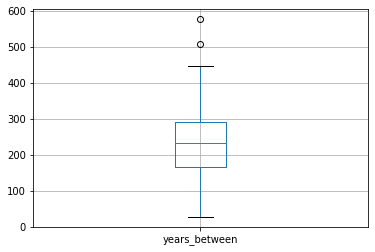

In [ ]:
# looking at the distribution of the 'years_between' variable
cascadia.boxplot(column='years_between')

In [ ]:
# need to get rid of the first recorded observation when analyzing the years
# between quakes because there is no data prior to that observation
cascadia_no_nans = cascadia[1:]

In [ ]:
# checking to make sure my new dataframe omitted the first original observation
cascadia_no_nans.head()

,mean_age,years_between,year,magnitude,num_of_records,rupture_len,rupture_width
1,9283,577.0,7268 BC,8.50,1,621.371,34.1754
2,9166,117.0,7151 BC,8.49,1,621.371,34.1754
3,9139,27.0,7124 BC,7.54,1,137.944,24.8548
4,8971,168.0,6956 BC,9.09,1,621.371,51.5738
5,8524,447.0,6509 BC,8.36,1,137.944,24.8548


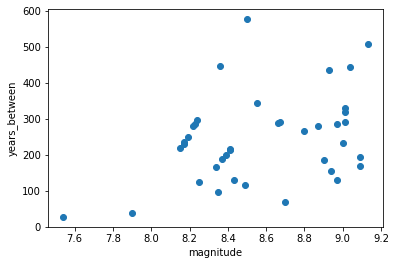

In [ ]:
import matplotlib.pyplot as plt
# create a scatterplot for two continuous variables: magnitude and years_between
# I am curious if there is a relationship between the magnitude of the quake and how 
# many years since the previous major earthquake
plt.scatter(x=cascadia_no_nans['magnitude'], y=cascadia_no_nans['years_between'])
plt.xlabel("magnitude")
plt.ylabel('years_between')
plt.show()

In [ ]:
# correlate the continuous variables for 'magnitude' and 'years_between'
from scipy import stats
x = cascadia_no_nans['magnitude']
y = cascadia_no_nans['years_between']
stats.pearsonr(x,y)

(0.3709971034495665, 0.020063267274037847)

The first value is our correlation coefficient and the second value is our p-value to test for significance. With a p-value < 0.05, our correlation coefficient suggests a positive, moderate relationship between the two continuous variables.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(array([2., 9., 4., 7., 8., 4., 2., 2., 0., 1.]),
 array([-191.44076859, -138.17709859,  -84.91342859,  -31.64975859,
          21.61391141,   74.87758141,  128.14125141,  181.40492141,
         234.66859141,  287.93226141,  341.19593141]),
 <a list of 10 Patch objects>)

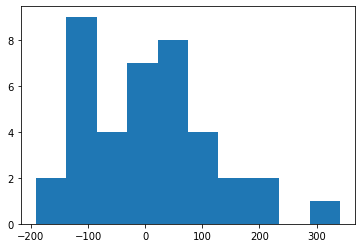

In [ ]:
import statsmodels.api as sm
# add the constant to the x variable you previously defined
X = sm.add_constant(x)
Y = y

# define the content of the model
mod = sm.OLS(Y,X)

# store the results of your fitted model
res = mod.fit()

#create a histogram of the residuals to confirm assumption of normality
plt.hist(res.resid)

A limitation of this analysis is that there are only 40 observations, 39 of which are considered for the linear regression on the association between magnitude and years_between. While this does satisfy the requirement for normally-distributed data, it only does so by a few observations.

In [ ]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          years_between   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     5.905
Date:                Thu, 17 Feb 2022   Prob (F-statistic):             0.0201
Time:                        12:43:34   Log-Likelihood:                -239.44
No. Observations:                  39   AIC:                             482.9
Df Residuals:                      37   BIC:                             486.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -768.7557    417.466     -1.841      0.0

December correlation coefficient for the 30-year timeframe:
0.3709971034495665


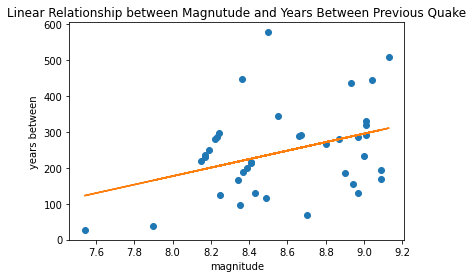

In [ ]:
# scatterplot with linear regression line for relationship 
import numpy as np

x = cascadia_no_nans['magnitude']
y = cascadia_no_nans['years_between']

plt.plot(x, y, 'o')
m, b = np.polyfit(x,y,1)
plt.plot(x, m*x + b)

plt.xlabel('magnitude')
plt.ylabel('years between')
plt.title('Linear Relationship between Magnutude and Years Between Previous Quake')

# correlation
print("December correlation coefficient for the 30-year timeframe:")
print(cascadia_no_nans['magnitude'].corr(cascadia_no_nans['years_between']))

There is a moderate positive linear relationship between the magnitude of the quake and the amount of years between quakes.

Now I want to look at only the earthquakes which had greater than or equalk to 322 years between. This will help give insight into what magnitude we can expect with the next earthquake since the association between magnitude and years between is significant.

In [ ]:
cascadia_long_between = cascadia_no_nans[cascadia_no_nans['years_between'] >= 322]

In [ ]:
#checking how many observations in the dataset had greater than or equal to 322 years between
len(cascadia_long_between.index)

7

In [ ]:
cascadia_long_between.describe()

,mean_age,years_between,magnitude,num_of_records,rupture_len,rupture_width
count,7.000000,7.000000,7.000000,7.0,7.000000,7.000000
mean,6748.142857,440.857143,8.788571,1.0,502.955429,39.856514
std,1765.556610,86.066696,0.308946,0.0,206.116368,11.392346
min,4173.000000,330.000000,8.360000,1.0,137.944000,24.854800
25%,5739.500000,391.000000,8.525000,1.0,448.630000,32.622000
50%,6531.000000,443.000000,8.930000,1.0,621.371000,34.175400
75%,7885.500000,477.000000,9.025000,1.0,621.371000,51.573800
max,9283.000000,577.000000,9.130000,1.0,621.371000,51.573800


A huge limitation here is that there are only 7 observations which fit the state of where we currently are in the Cascadia Subduction year_between length. The average magnitude for a quake with this length of time between is 8.79 with a standard deviation of 0.3. This is still valuable information, though since we only have 7 observations, it is not entirely reliable.

Back to the model we fit!

Using scikit learn on a dataset with <50 observations is a bad idea but I did it anyway. Half for practice and half for curiosity.

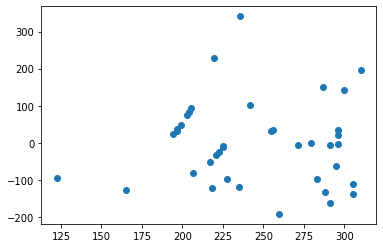

In [ ]:
# visualizing the plot of fitted values vs residuals
# i know this isnt a fancy plot. when i have more time i'll update it
plt.scatter(res.fittedvalues, res.resid)

(array([2., 9., 4., 7., 8., 4., 2., 2., 0., 1.]),
 array([-191.44076859, -138.17709859,  -84.91342859,  -31.64975859,
          21.61391141,   74.87758141,  128.14125141,  181.40492141,
         234.66859141,  287.93226141,  341.19593141]),
 <a list of 10 Patch objects>)

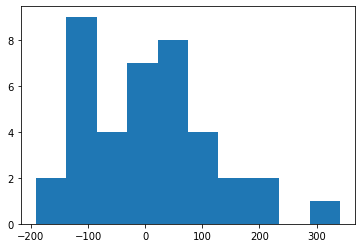

In [ ]:
# creating a histogram of the results.resid
plt.hist(res.resid)

In [ ]:
# testing the normality
import statsmodels.stats.api as sms
sms.diagnostic.kstest_normal(res.resid)

(0.11204454263279107, 0.2)

Our p-value is greater than 0.05 so the results seem to be normally distributed.

In [ ]:
# testing heterogenity

from statsmodels.stats.diagnostic import het_breuschpagan
sms.het_breuschpagan(res.resid, X)

(0.21829910870067093,
 0.6403389794126156,
 0.20827005614230223,
 0.6507944127033413)

Test of heterogenity: test statistic is 0.208 and p-value is 0.65. Therefore, this meets the assumptions.

In [ ]:
cascadia_no_nans = cascadia_no_nans.drop(columns=['year'])

In [ ]:
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

X = cascadia_no_nans.drop(columns = ['years_between'])
y = cascadia_no_nans['years_between']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fill missing values with medians
imputer = SimpleImputer(strategy="median")
X_train_tr = imputer.fit_transform(X_train)
# scaling the data
scale = StandardScaler()
X_train_tr = scale.fit_transform(X_train)

# same for test data, though we do not want to fit it because we don't want it to learn from it
X_test_tr = imputer.transform(X_test)
X_test_tr = scale.transform(X_test_tr)



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# initiate the k-nearest neighbors regressor class
knn = KNeighborsRegressor()
# train the knn model on training data
knn.fit(X_train_tr, y_train)
# make predictions on test data
y_pred = knn.predict(X_test_tr)
# measure the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

103.56118964167995


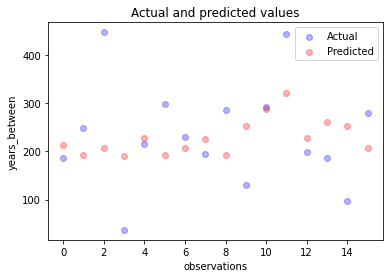

In [ ]:
plt.scatter(x= range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
plt.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('observations')
plt.ylabel('years_between')
plt.legend()
plt.show()